<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_05_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment_05_01

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [62]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [64]:
data=df.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MKT','Profit': 'PFT'},axis=1)
data

,RDS,ADM,MKT,State,PFT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
data.isna().sum()

RDS      0
ADM      0
MKT      0
State    0
PFT      0
dtype: int64

In [66]:
data.describe()

,RDS,ADM,MKT,PFT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Correlation Analysis

In [67]:
data.corr()

,RDS,ADM,MKT,PFT
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PFT,0.972900,0.200717,0.747766,1.000000


Scatterplot between variables along with histograms

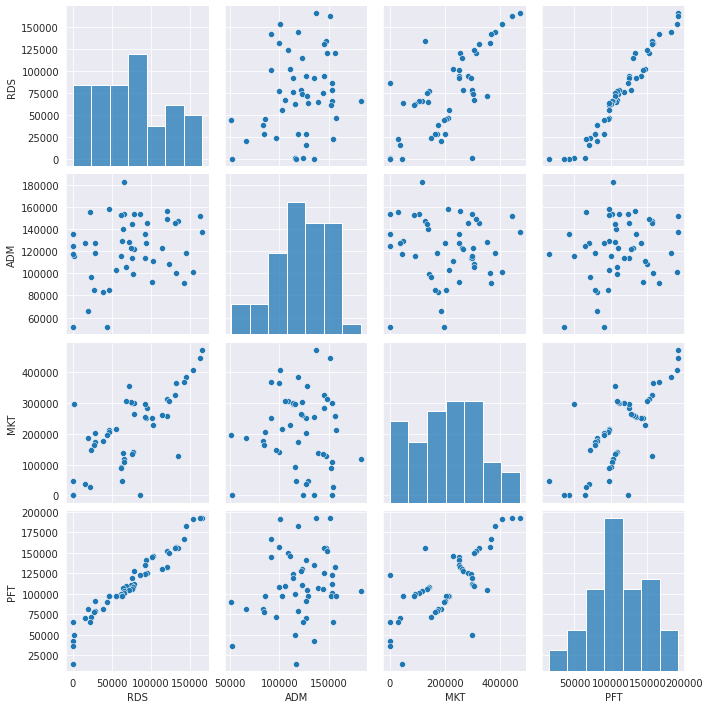

In [68]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

Preparing a model

In [69]:
model=smf.ols("PFT~RDS+ADM+MKT",data=data).fit()

In [70]:
#Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKT              0.027228
dtype: float64

In [71]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RDS          17.846374
ADM          -0.525507
MKT           1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADM          6.017551e-01
MKT          1.047168e-01
dtype: float64


In [72]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Simple Linear Regression Models

In [73]:
slr_a=smf.ols("PFT~ADM",data=data).fit()
#t and p-Values
print(slr_a.tvalues ,'\n', slr_a.pvalues) 

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [74]:
slr_a=smf.ols("PFT~MKT",data=data).fit()
#t and p-Values
print(slr_a.tvalues ,'\n', slr_a.pvalues)

Intercept    7.808356
MKT          7.802657
dtype: float64 
 Intercept    4.294735e-10
MKT          4.381073e-10
dtype: float64


In [75]:
slr_a=smf.ols("PFT~ADM+MKT",data=data).fit()
#t and p-Values
print(slr_a.tvalues ,'\n', slr_a.pvalues)

Intercept    1.142741
ADM          2.467779
MKT          8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MKT          9.727245e-11
dtype: float64


Calculating VIF

In [76]:
rsq_rds=smf.ols("RDS~ADM+MKT",data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm=smf.ols("ADM~RDS+MKT",data=data).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mkt=smf.ols("MKT~RDS+ADM",data=data).fit().rsquared
vif_mkt=1/(1-rsq_mkt)

In [77]:
# Storing vif values in a data frame
d1={'Variables':['RDS','ADM','MKT'],'Vif':[vif_rds,vif_adm,vif_mkt]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Vif
0,RDS,2.468903
1,ADM,1.175091
2,MKT,2.326773


Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

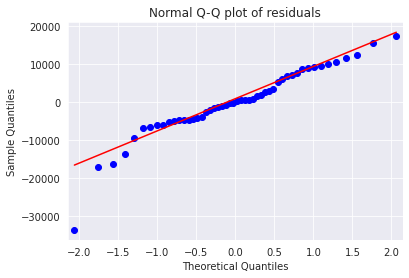

In [78]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [79]:
list(np.where(model.resid<-30000))

[array([49])]

Residual Plot for Homoscedasticity

In [80]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()      

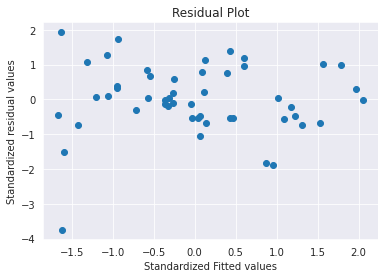

In [81]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

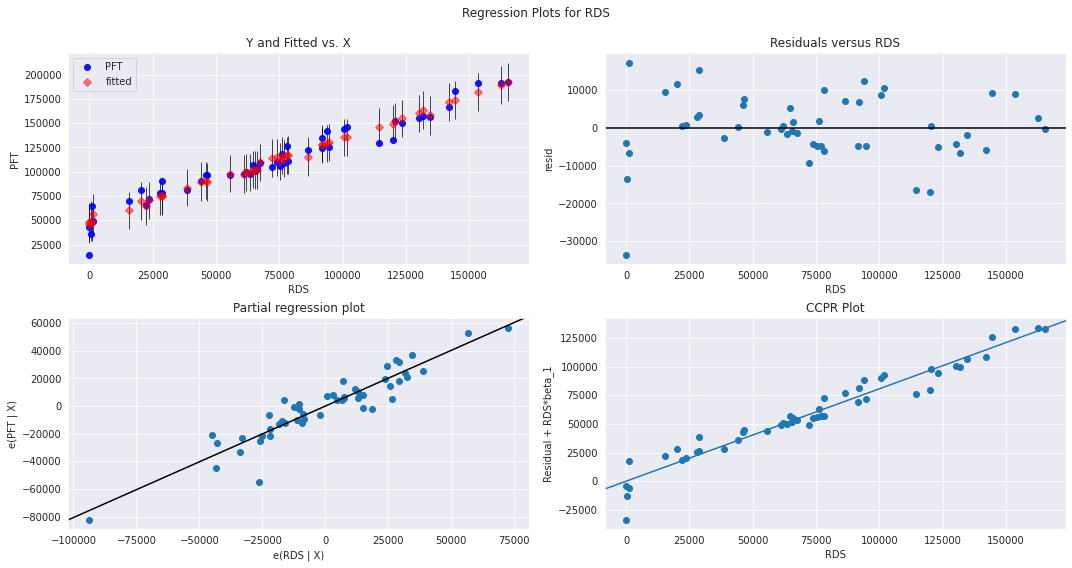

In [82]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

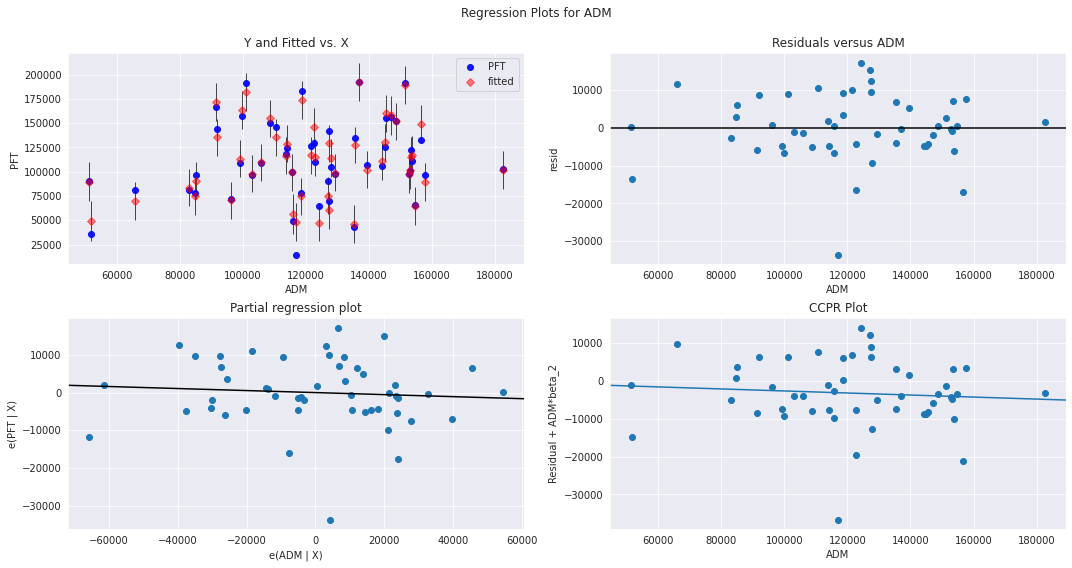

In [83]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

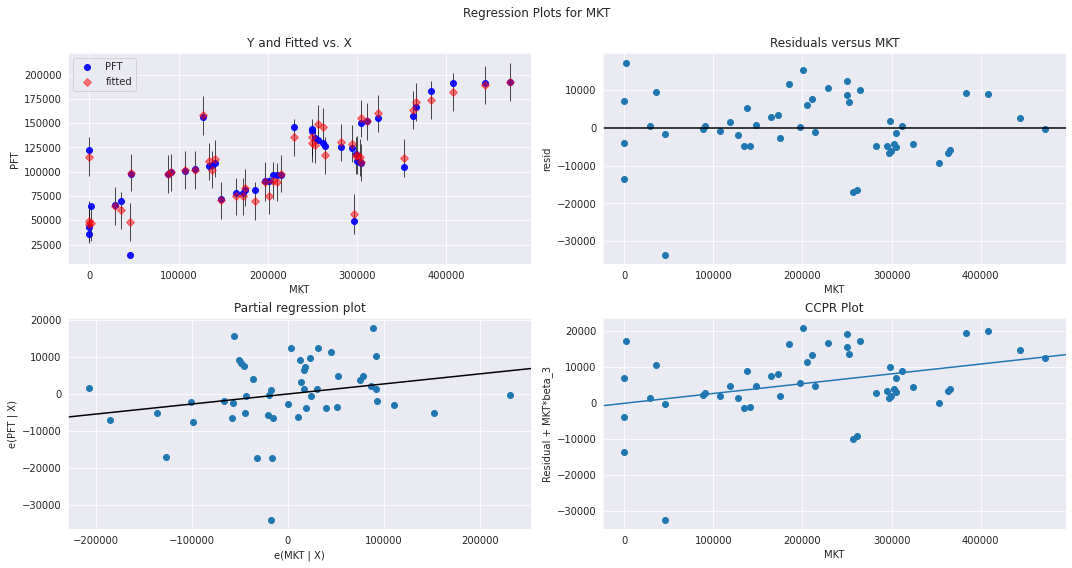

In [84]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKT',fig=fig)
plt.show()

Model Deletion Diagnostics

Detecting Influencers/Outliers
Cook’s Distance

In [85]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


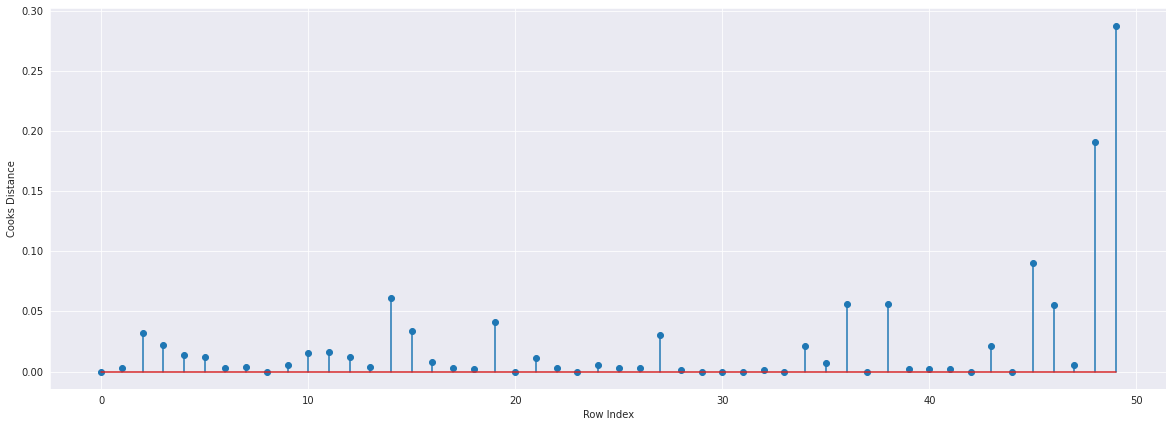

In [86]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [87]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

High Influence points

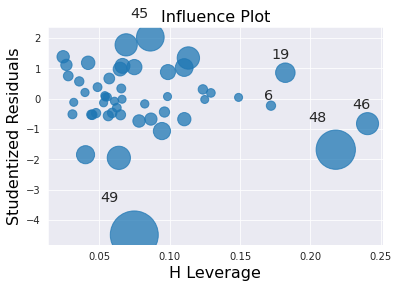

In [88]:
influence_plot(model)
plt.show()

In [89]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff
# Points beyond Leverage_cutoff value are influencers

0.36

In [90]:
data[data.index.isin([49])] 

,RDS,ADM,MKT,State,PFT
49,0.0,116983.8,45173.06,California,14681.4


In [91]:
#See the differences in RDS and other variable values
data.head()

,RDS,ADM,MKT,State,PFT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Improving the model

In [ ]:
data1=data.drop(data.index[[49]],axis=0).reset_index()
data1

In [93]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [ ]:
data1

Build Model

In [95]:
#with new data generate R-Squared and AIC values
final_ml=smf.ols("PFT~RDS+ADM+MKT",data=data1).fit()

In [96]:
(final_ml.rsquared,final_ml.rsquared_adj, final_ml.aic) 

(0.9613162435129848, 0.9587373264138505, 1020.5652974526366)

In [97]:
# model accuracy is improved to 0.9613162435129847

In [98]:
model_influence = final_ml.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


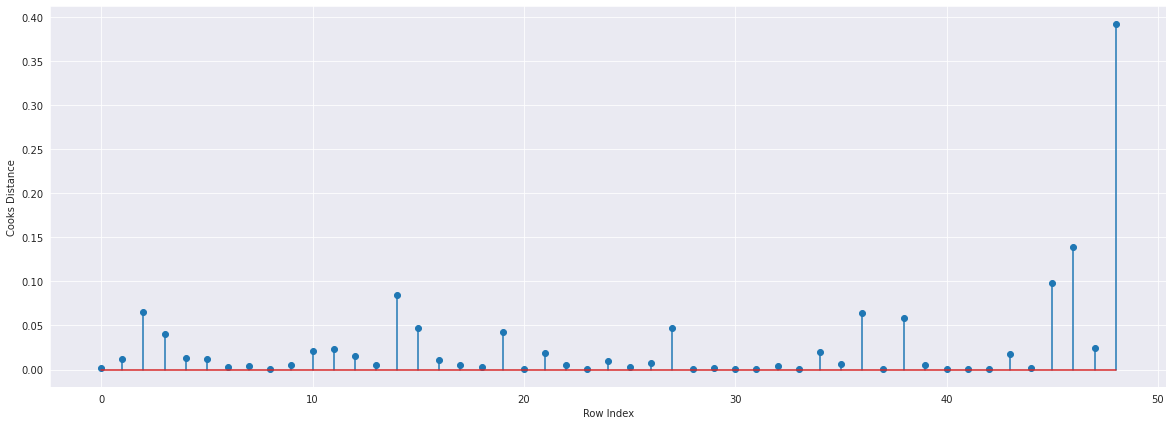

In [99]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [100]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(48, 0.39274420556321504)

In [101]:
data1[data1.index.isin([48])] 

,RDS,ADM,MKT,State,PFT
48,542.05,51743.15,0.0,New York,35673.41


In [ ]:
data2=data1.drop(data1.index[[48]],axis=0).reset_index(drop=True)
data2

In [103]:
#Build the model on the new data
final_model=smf.ols("PFT~RDS+ADM+MKT",data=data2).fit()

In [104]:
#Again check for influencers
model_influence = final_model.get_influence()
(c_f, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

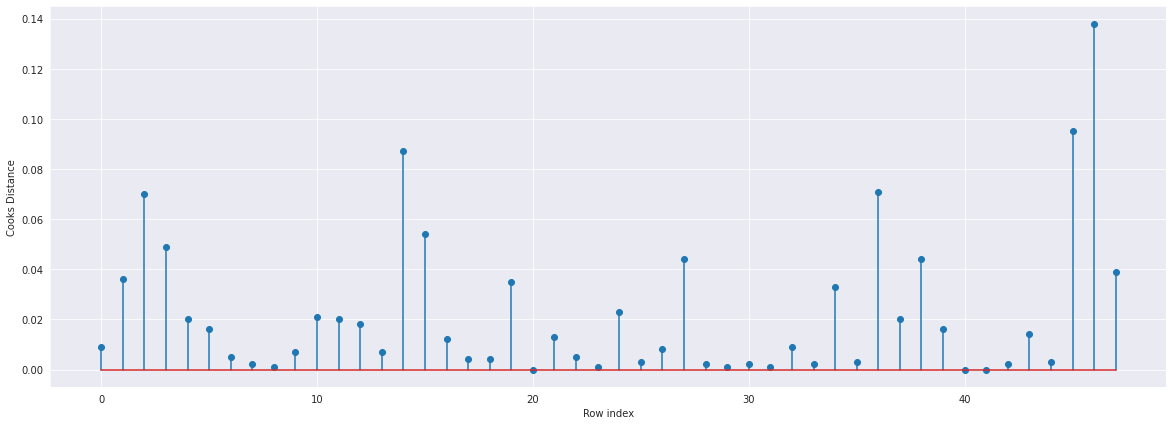

In [105]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_f,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [106]:
#index of the data points where c is more than .5
(np.argmax(c_f),np.max(c_f))

(46, 0.13829133994334164)

we can stop the diagnostic process and finalize the model

In [107]:
(final_model.rsquared,final_model.rsquared_adj,final_model.aic)

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

Predicting for new data

In [113]:
# New data for prediction
new_data=pd.DataFrame({'RDS':70000,"ADM":90000,"MKT":140000},index=[1])
new_data

,RDS,ADM,MKT
1,70000,90000,140000


In [114]:
final_model.predict(new_data)

1    111027.02823
dtype: float64

In [118]:
final_model.predict(data2.iloc[0:5,])

0    188939.277484
1    185378.579127
2    180724.354190
3    172036.176973
4    171688.341312
dtype: float64

In [119]:
pred_y = final_model.predict(data2)

In [120]:
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64